In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import numpy as np
import tensorflow as tf

/usr/local/anaconda/python3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.5.0
1.14.0
2.1.0


In [5]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("mnist_data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [12]:
def display_digit(digit):
    plt.imshow(digit.reshape(28,28), cmap="Greys", interpolation='nearest')

In [43]:
training_digits, training_labels = mnist.train.next_batch(10000)
test_digits, test_labels = mnist.test.next_batch(200)

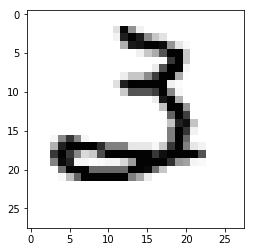

In [44]:
display_digit(training_digits[1])

In [45]:
training_labels[:5]

array([0, 3, 0, 5, 4], dtype=uint8)

In [46]:
tf.reset_default_graph()

In [47]:
training_digits_pl = tf.placeholder("float", [None,784])

In [48]:
test_digit_pl = tf.placeholder("float",[784])

In [49]:
def get_majority_predicted_label(labels, indices):
    
    predicted_labels = []
    for i in indices:
        predicted_labels.append(labels[i])
        
    predicted_labels = np.array(predicted_labels)
    print(predicted_labels)
    
    counts = np.bincount(predicted_labels)
    
    return np.argmax(counts)

In [50]:
l1_distance = tf.abs(tf.subtract(training_digits_pl, test_digit_pl))

distance_l1 = tf.reduce_sum(l1_distance, axis=1)

pred_knn_l1 = tf.nn.top_k(tf.negative(distance_l1),k=5)

In [51]:
accuracy=0.

In [52]:
init = tf.global_variables_initializer()

In [53]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(len(test_digits)):
        _, indices = sess.run(pred_knn_l1,
                             feed_dict={training_digits_pl: training_digits,
                                       test_digit_pl: test_digits[i,:]})
        predicted_label =get_majority_predicted_label(training_labels, indices)
        
        print("Test", i, "Prediction:", predicted_label,
             "True Label:", test_labels[i])
        
        if predicted_label == test_labels[i]:
            accuracy += 1./len(test_digits)
            
     
    print("Done!")
    print("Accuracy:", accuracy)



[7 7 7 7 7]
Test 0 Prediction: 7 True Label: 7
[7 7 7 7 7]
Test 1 Prediction: 7 True Label: 7
[0 0 0 0 0]
Test 2 Prediction: 0 True Label: 0
[2 2 2 2 1]
Test 3 Prediction: 2 True Label: 2
[8 8 8 1 8]
Test 4 Prediction: 8 True Label: 8
[1 1 1 1 1]
Test 5 Prediction: 1 True Label: 1
[3 3 3 3 3]
Test 6 Prediction: 3 True Label: 3
[1 1 1 1 1]
Test 7 Prediction: 1 True Label: 1
[7 9 7 7 7]
Test 8 Prediction: 7 True Label: 3
[5 5 5 5 5]
Test 9 Prediction: 5 True Label: 5
[6 6 6 6 6]
Test 10 Prediction: 6 True Label: 6
[6 6 6 6 6]
Test 11 Prediction: 6 True Label: 6
[5 5 5 5 5]
Test 12 Prediction: 5 True Label: 5
[4 4 4 4 4]
Test 13 Prediction: 4 True Label: 4
[7 7 7 7 7]
Test 14 Prediction: 7 True Label: 7
[9 9 9 9 9]
Test 15 Prediction: 9 True Label: 9
[1 1 1 1 1]
Test 16 Prediction: 1 True Label: 1
[1 7 1 7 1]
Test 17 Prediction: 1 True Label: 7
[8 8 8 8 8]
Test 18 Prediction: 8 True Label: 8
[7 7 7 7 7]
Test 19 Prediction: 7 True Label: 7
[6 6 6 6 6]
Test 20 Prediction: 6 True Label: 6
[1

Test 193 Prediction: 9 True Label: 9
[5 5 5 5 5]
Test 194 Prediction: 5 True Label: 5
[9 9 9 9 7]
Test 195 Prediction: 9 True Label: 9
[4 4 4 9 4]
Test 196 Prediction: 4 True Label: 4
[2 2 2 2 2]
Test 197 Prediction: 2 True Label: 2
[6 6 6 6 6]
Test 198 Prediction: 6 True Label: 6
[3 3 3 3 3]
Test 199 Prediction: 3 True Label: 3
Done!
Accuracy: 0.9500000000000007
